# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Found path: /home/minhna4lab/minhna1112/study/RL/deep-reinforcement-learning/p3_collab-compet/Tennis_Linux_NoVis/Tennis.x86_64
Mono path[0] = '/home/minhna4lab/minhna1112/study/RL/deep-reinforcement-learning/p3_collab-compet/Tennis_Linux_NoVis/Tennis_Data/Managed'
Mono config path = '/home/minhna4lab/minhna1112/study/RL/deep-reinforcement-learning/p3_collab-compet/Tennis_Linux_NoVis/Tennis_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/minhna4lab/.config/unity3d/Unity Technologies/Unity Environment/Player.log


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
env.brain_names

['TennisBrain']

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations # [2, 24]
state_size = states.shape[1] # 24
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    print("States", states.shape)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

States (2, 24)
Score (max over agents) from episode 1: 0.09000000171363354
States (2, 24)
Score (max over agents) from episode 2: 0.0
States (2, 24)
Score (max over agents) from episode 3: 0.0
States (2, 24)
Score (max over agents) from episode 4: 0.0
States (2, 24)
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [8]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import os
import random
from collections import deque

import torch
import numpy as np
import wandb  # Import wandb for experiment tracking and logging.

from utils import Config, ReplayBuffer
from agents import MADDPG 
from load_env import env_vars

# Initialize the Unity environment.
# env = UnityEnvironment(file_name="./Tennis_Linux_NoVis/Tennis.x86_64")

# Get the default brain, which is responsible for decision making in agents.
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print("brain name:", brain_name)
print("brain:", brain)

# Reset the environment to get the initial state information.
env_info = env.reset(train_mode=True)[brain_name]

# Number of agents in the environment.
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# Size of action space for each agent.
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# Examine the state space for the agents.
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

# Training parameters.
LEARN_NUM = 5  # Number of learning passes per training step.
n_episodes = 2000  # Total number of training episodes.
max_t = 10000  # Maximum number of timesteps per episode.

# Configuration and agent initialization.
configs = Config()
maddpg = MADDPG(configs)  # Initialize the MADDPG agents.
memory = ReplayBuffer(configs)  # Replay buffer for storing experiences.
scores_window = deque(maxlen=100)  # Last 100 scores.
scores_all = []  # List to store all scores for each episode.
moving_average = []  # Moving average of scores.
best_score = -np.inf  # Initialize best score to negative infinity.
PRINT_EVERY = 10  # Frequency of printing information.
SOLVED_SCORE = 0.5  # Score at which the environment is considered solved.

# Initialize wandb for logging.
wandb.init(project=env_vars.WANDB_PROJECT_NAME, entity=env_vars.WANDB_USER_NAME)

# Directory for saving model checkpoints.
model_dir = os.getcwd() + "/checkpoints"
os.makedirs(model_dir, exist_ok=True)

# Noise parameters for action exploration.
START_NOISE_DECAY = 5.0
noise_decay = START_NOISE_DECAY

# Main training loop.
for i_episode in range(1, n_episodes + 1):
    env_info = env.reset(train_mode=True)[brain_name]  # Reset the environment at the start of each episode.
    maddpg.reset()  # Reset noise added to the actions.
    states = env_info.vector_observations
    states = np.reshape(states, (1, num_agents * state_size))  # Flatten states for all agents.
    scores = np.zeros(num_agents)  # Initialize scores for each agent.

    for episode_t in range(max_t):
        actions = maddpg.act(states, add_noise=True, noise_decay=noise_decay)  # Agent action with noise for exploration.
        env_info = env.step(actions)[brain_name]  # Send actions to the environment and receive results.
        next_states = env_info.vector_observations
        next_states = np.reshape(next_states, (1, num_agents * state_size))  # Flatten next states.
        rewards = env_info.rewards  # Get rewards.
        dones = env_info.local_done  # Check for episode termination.
        actions = np.expand_dims(actions, axis=0)  # Reshape actions.

        # Store experiences in replay buffer.
        memory.add(states, actions, rewards, next_states, dones)

        # Learn if enough samples are available in the memory.
        if len(memory) > configs.BATCH_SIZE:
            for a_i in range(num_agents):
                samples = memory.sample()
                maddpg.update(a_i, samples, None)  # Update agents.
            maddpg.iter += 1

        scores += rewards  # Update the score with rewards.
        states = next_states  # Transition to the next state.

        if np.any(dones):  # Exit loop if episode ends.
            break

    # Record episode statistics.
    ep_best_score = np.max(scores)
    scores_window.append(ep_best_score)
    scores_all.append(ep_best_score)
    moving_average.append(np.mean(scores_window))

    # Save best score.
    if ep_best_score > best_score:
        best_score = ep_best_score

    #


brain name: TennisBrain
brain: Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 
Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -7.98782539 -1.5
 -0.          0.         -7.11741829  5.97645617 -0.          0.        ]
===================== Actor Network =========================
===================== Critic Network =========================
===================== Actor Network =========================
===

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: minhna1112. Use `wandb login --relogin` to force relogin


Episodes 0000-0010	Max Reward: 0.000	Moving Average: 0.000	Noise decay: 0.500
Episodes 0010-0020	Max Reward: 0.100	Moving Average: 0.005	Noise decay: 0.250
Episodes 0020-0030	Max Reward: 0.000	Moving Average: 0.003	Noise decay: 0.167
Episodes 0030-0040	Max Reward: 0.000	Moving Average: 0.003	Noise decay: 0.125
Episodes 0040-0050	Max Reward: 0.000	Moving Average: 0.002	Noise decay: 0.100
Episodes 0050-0060	Max Reward: 0.100	Moving Average: 0.003	Noise decay: 0.083
Episodes 0060-0070	Max Reward: 0.000	Moving Average: 0.003	Noise decay: 0.071
Episodes 0070-0080	Max Reward: 0.000	Moving Average: 0.003	Noise decay: 0.062
Episodes 0080-0090	Max Reward: 0.000	Moving Average: 0.002	Noise decay: 0.056
Episodes 0090-0100	Max Reward: 0.000	Moving Average: 0.002	Noise decay: 0.050
Episodes 0100-0110	Max Reward: 0.000	Moving Average: 0.002	Noise decay: 0.045
Episodes 0110-0120	Max Reward: 0.000	Moving Average: 0.001	Noise decay: 0.042
Episodes 0120-0130	Max Reward: 0.000	Moving Average: 0.001	Noise

Episode,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
Max Reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▂▁▂▁▁▁▂▁▂▂▁▂▂▃▂▂▃▂█
Moving Average,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▂▂▂▂▂▂▂▂▂▂▃▃▃▃▅▆▆▅█
agent_0_actor_loss,███▇▇▇▇▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▃▄▃▃▃▃▃▃▂▂▃▂▁▁▂▁
agent_0_critic_loss,▁▁▁▂▁▁▂▂▃▃▃▄▄▄▄▄▆▅▆█▄▄▅█▅▄▅▅▃▆▆▄▆▅▇▆▆▅▆▆
agent_1_actor_loss,███████▇▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▄▄▄▃▃▃▃▃▃▂▃▂▂▂▂▁▁
agent_1_critic_loss,▁▁▁▁▁▁▄▁▁▁▂▁▂▃▃▂▃▄▅▃▄▄▆▅▄▅▅▄▅▅█▅▇▆▄▅▃▆▃▅
iteration,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
Episode,1575
Max Reward,2.6
Moving Average,0.5124


In [ ]:
env.close()


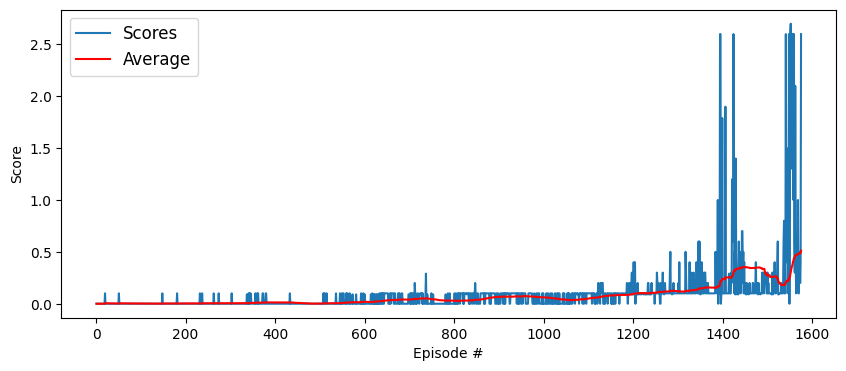

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_all)+1), scores_all, label='Scores')
plt.plot(np.arange(1, len(moving_average)+1), moving_average, c='r', label='Average')
plt.ylabel('Score')
plt.xlabel('Episode #')
ax.legend(fontsize='large', loc='upper left')
fig.savefig('assets/result.png')
plt.show()

More details about the metrics logged during training could be found [here](https://api.wandb.ai/links/minhna1112/fe4lxm3s)